In [1]:
import pandas as pd

In [2]:
d1 = {'letter':['a','b','c','d'],'number':[1,2,3,4]}
d2 ={'letter':['d','e','f'],'number':[4,5,6]}
df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)
df1

,letter,number
0,a,1
1,b,2
2,c,3
3,d,4


In [3]:
df2

,letter,number
0,d,4
1,e,5
2,f,6


In [4]:
pd.concat([df1,df2])

,letter,number
0,a,1
1,b,2
2,c,3
3,d,4
0,d,4
1,e,5
2,f,6


In [5]:
pd.concat([df1,df2],axis=1)

,letter,number,letter,number
0,a,1,d,4.0
1,b,2,e,5.0
2,c,3,f,6.0
3,d,4,NaN,NaN


In [6]:
pd.concat([df1,df2],axis=1,join='inner')

,letter,number,letter,number
0,a,1,d,4
1,b,2,e,5
2,c,3,f,6


In [12]:
left = pd.DataFrame({'key' :["k0","k1","k2"],"A":['ao','a1','a2'],"B":['bo','b1','b2']})
right = pd.DataFrame({'key' :["k0","k3"],"C":['co','c3'],"D":['do','d3']})
left

,key,A,B
0,k0,ao,bo
1,k1,a1,b1
2,k2,a2,b2


In [13]:
right

,key,C,D
0,k0,co,do
1,k3,c3,d3


In [10]:
pd.merge(left,right,on='key',how='inner') # inner join -common records of left and right

,key,A,B,C,D
0,k0,ao,bo,co,do


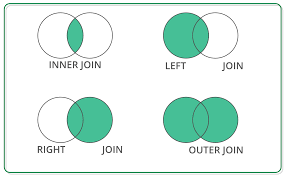

In [11]:
pd.merge(left,right,on='key',how='left') #Left join - all records of left and only common records of right

,key,A,B,C,D
0,k0,ao,bo,co,do
1,k1,a1,b1,NaN,NaN
2,k2,a2,b2,NaN,NaN


In [14]:
pd.merge(left,right,on='key',how='right') #right join - all records of right,only common records of left

,key,A,B,C,D
0,k0,ao,bo,co,do
1,k3,NaN,NaN,c3,d3


In [15]:
pd.merge(left,right,on='key',how='outer') # outer join-all records of left and right

,key,A,B,C,D
0,k0,ao,bo,co,do
1,k1,a1,b1,NaN,NaN
2,k2,a2,b2,NaN,NaN
3,k3,NaN,NaN,c3,d3


In [16]:
df1 = pd.read_csv("loan.csv")
df1

,LOAN_NO,BRANCH_NM,AMOUNT
0,l-02,HDFC,100000
1,l-01,SBI,200000
2,l-03,BOI,400000
3,l-04,HDFC,500000
4,l-05,Axis,600000


In [17]:
df2 = pd.read_csv("customer.csv")
df2

,CUSTOMER_NM,LOAN_NO,Education,Married
0,C,l-05,Graduate,No
1,B,l-03,Not Graduate,Yes
2,A,l-01,Graduate,Yes


In [20]:
df1.drop_duplicates(inplace=True) #check for duplicates -if present drop it
df1

,LOAN_NO,BRANCH_NM,AMOUNT
0,l-02,HDFC,100000
1,l-01,SBI,200000
2,l-03,BOI,400000
3,l-04,HDFC,500000
4,l-05,Axis,600000


In [21]:
pd.merge(df1,df2,how='outer')

,LOAN_NO,BRANCH_NM,AMOUNT,CUSTOMER_NM,Education,Married
0,l-02,HDFC,100000,NaN,NaN,NaN
1,l-01,SBI,200000,A,Graduate,Yes
2,l-03,BOI,400000,B,Not Graduate,Yes
3,l-04,HDFC,500000,NaN,NaN,NaN
4,l-05,Axis,600000,C,Graduate,No


In [24]:
dfnew = pd.merge(df1,df2,how='left')

In [23]:
pd.merge(df1,df2,how='inner')

,LOAN_NO,BRANCH_NM,AMOUNT,CUSTOMER_NM,Education,Married
0,l-01,SBI,200000,A,Graduate,Yes
1,l-03,BOI,400000,B,Not Graduate,Yes
2,l-05,Axis,600000,C,Graduate,No


In [25]:
dfnew.to_csv("loan_customer.csv")

In [26]:
dfnew1 = pd.read_csv("loan_customer.csv")
dfnew1

,Unnamed: 0,LOAN_NO,BRANCH_NM,AMOUNT,CUSTOMER_NM,Education,Married
0,0,l-02,HDFC,100000,NaN,NaN,NaN
1,1,l-01,SBI,200000,A,Graduate,Yes
2,2,l-03,BOI,400000,B,Not Graduate,Yes
3,3,l-04,HDFC,500000,NaN,NaN,NaN
4,4,l-05,Axis,600000,C,Graduate,No


In [31]:
d1 = pd.merge(df1,df2,how='inner')

In [33]:
d1.to_excel('example.xlsx')

In [35]:
dfnew1 = pd.read_excel("example.xlsx")
dfnew1

,Unnamed: 0,LOAN_NO,BRANCH_NM,AMOUNT,CUSTOMER_NM,Education,Married
0,0,l-01,SBI,200000,A,Graduate,Yes
1,1,l-03,BOI,400000,B,Not Graduate,Yes
2,2,l-05,Axis,600000,C,Graduate,No


In [37]:
df = pd.DataFrame({'Name': ['Arya', 'Rahul', 'Riya', 'Yash', 'Siddhant'],
                   'Type': ['Full-time', 'Intern', 'Full-time', 
                            'Part-time', 'Full-time'],
                   'Department': ['Administration', 'Technical', 'Administration', 
                                  'HR', 'HR'],
                   'Exp': [4, 1, 3, 2, 6],
                   'Salary': [20000, 5000, 10000, 10000, 70000]})
df

,Name,Type,Department,Exp,Salary
0,Arya,Full-time,Administration,4,20000
1,Rahul,Intern,Technical,1,5000
2,Riya,Full-time,Administration,3,10000
3,Yash,Part-time,HR,2,10000
4,Siddhant,Full-time,HR,6,70000


In [40]:
# Create a pivot table to find avg salary of employees across depts.
pd.pivot_table(data=df,columns=['Department'],values='Salary',aggfunc='mean')

Department,Administration,HR,Technical
Salary,15000,40000,5000


In [ ]:
# Full time employee of Admin dept-avg salary

In [42]:
pd.pivot_table(data=df,index=['Type'],columns=['Department'],values='Salary',aggfunc='mean')

Department,Administration,HR,Technical
Type,,,
Full-time,15000.0,70000.0,NaN
Intern,NaN,NaN,5000.0
Part-time,NaN,10000.0,NaN


In [ ]:
# Pivot table with multiple aggfuncs - salary of employees


In [43]:
pd.pivot_table(data=df,index=['Type'],columns=['Department'],values='Salary',aggfunc= ['mean','sum','count'])

mean                               sum           \
Department Administration       HR Technical Administration       HR   
Type                                                                   
Full-time         15000.0  70000.0       NaN        30000.0  70000.0   
Intern                NaN      NaN    5000.0            NaN      NaN   
Part-time             NaN  10000.0       NaN            NaN  10000.0   

                              count                 
Department Technical Administration   HR Technical  
Type                                                
Full-time        NaN            2.0  1.0       NaN  
Intern        5000.0            NaN  NaN       1.0  
Part-time        NaN            NaN  1.0       NaN

In [46]:
# Calculate row and column totals (margins)
pd.pivot_table(data=df,index=['Type'],columns=['Department'],values='Salary',aggfunc='mean',margins=True,margins_name='Total')

Department,Administration,HR,Technical,Total
Type,,,,
Full-time,15000.0,70000.0,NaN,33333.333333
Intern,NaN,NaN,5000.0,5000.000000
Part-time,NaN,10000.0,NaN,10000.000000
Total,15000.0,40000.0,5000.0,23000.000000


In [49]:
# Replacing missing values
pd.pivot_table(data=df,index='Type',columns=['Department'],values='Salary',aggfunc='mean',margins=True,margins_name='Total',fill_value=0)


Department,Administration,HR,Technical,Total
Type,,,,
Full-time,15000,70000,0,33333.333333
Intern,0,0,5000,5000.000000
Part-time,0,10000,0,10000.000000
Total,15000,40000,5000,23000.000000


In [51]:
# Passing Type and then Name as indices
pd.pivot_table(data=df,index=['Type','Name'],columns=['Department'],values='Salary',aggfunc=['sum'],margins=True,margins_name='Total',fill_value='NA')


sum                           
Department         Administration       HR Technical   Total
Type      Name                                              
Full-time Arya            20000.0       NA        NA   20000
          Riya            10000.0       NA        NA   10000
          Siddhant             NA  70000.0        NA   70000
Intern    Rahul                NA       NA    5000.0    5000
Part-time Yash                 NA  10000.0        NA   10000
Total                       30000    80000      5000  115000

#### Make a pivot table which shows the average salary of each type of employee in each department and the sum of the total years of experience (YoE) of each employee in each department.

In [57]:
pd.pivot_table(data=df,index=['Department','Type'],values=['Salary','Exp'],aggfunc={'Salary':'mean','Exp':'sum'})


Exp  Salary
Department     Type                  
Administration Full-time    7   15000
HR             Full-time    6   70000
               Part-time    2   10000
Technical      Intern       1    5000

In [60]:
import greetmodule

In [61]:
greetmodule.hello("Akshatha")

Hai,Welcome Akshatha


## Case Study

In [63]:
df = pd.read_csv("terror_gtd.csv")
df.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,location,summary,success,suicide,nkill,nwound
0,1.970000e+11,1970,0,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,NaN,1,0,1.0,0.0
1,1.970000e+11,1970,0,0,Mexico,North America,NaN,Mexico city,NaN,NaN,1,0,0.0,0.0
2,1.970000e+11,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,NaN,NaN,1,0,1.0,0.0
3,1.970000e+11,1970,1,0,Greece,Western Europe,Attica,Athens,NaN,NaN,1,0,NaN,NaN
4,1.970000e+11,1970,1,0,Japan,East Asia,NaN,Fukouka,NaN,NaN,1,0,NaN,NaN


In [68]:
#Which country had highest attacks since 1970? 
df['country_txt'].value_counts(ascending=False).head(1)

Iraq    18770
Name: country_txt, dtype: int64

In [ ]:
df['country_txt'].value_counts().sort_values(ascending=False).head(1)

In [73]:
df['country_txt'].describe()

count     156772
unique       206
top         Iraq
freq       18770
Name: country_txt, dtype: object

In [72]:
df['country_txt'].describe()[2]

'Iraq'

#  Break - 11:05 -11:20

In [74]:
#How many attacks happened in India? 
df['country_txt'][df.country_txt=='India'].value_counts()

India    9940
Name: country_txt, dtype: int64

In [77]:
df[df['country_txt']=='India'][['country_txt','eventid']].groupby('country_txt').count()

,eventid
country_txt,
India,9940


In [78]:
df[df['country_txt']=='India'].shape[0]

9940

In [ ]:
#How many attacks happened in India and upto 7 people were killed?
#Hint: Use the country_txt and nkill column.


In [82]:
df['country_txt'][df.country_txt=='India'][df.nkill<=7].value_counts()

India    9184
Name: country_txt, dtype: int64

In [80]:
df[(df['country_txt']=="India") & (df['nkill']<=7)].shape[0]

9184

In [81]:
df['nkill'][(df['country_txt']=='India') & (df['nkill']<=7)].count()

9184

In [88]:
#Extract any 4 cities and summary for attacks above  # Out of 9184 entres- any 4 city and summary
df[(df['country_txt']=="India") & (df['nkill']<=7)][['city','summary']].tail(4)

,city,summary
156698,Peravurani,12/29/2015: An explosive device was discovered...
156713,Tulsibari,12/29/2015: Assailants abducted Hazrat Ali in ...
156725,Zhutovi,12/30/2015: Assailants attempted to extort mon...
156756,Srinagar,12/31/2015: Assailants threw a grenade at an I...


In [83]:
df[['city','summary']][(df['country_txt']=='India') & (df['nkill']<=7)].head(4)

,city,summary
1185,New Delhi,NaN
2688,Samastipur,"1/2/1975: The Indian Railway Minister, Lalit N..."
3780,New Delhi,NaN
5251,Bombay,NaN


In [106]:
#In a single terror incident in India, find out top 3 cities by number killed 
#Hint: Use each row as a unique terror incident.
# Use country_txt, nkill and city columns


In [107]:
df[df['country_txt'] == 'India'].sort_values(by='nkill',ascending=False)[['city','nkill']].head(3)

,city,nkill
81000,Mumbai,188.0
96598,Jhargam,115.0
54339,Mumbai,115.0


In [90]:
df[['city','nkill']][df['country_txt']=='India'].sort_values(ascending=False, by="nkill").head(1)


,city,nkill
81000,Mumbai,188.0


In [91]:
df[(df['country_txt']=="India")][['city','nkill']].sort_values(by='nkill',ascending=False).head(3)


,city,nkill
81000,Mumbai,188.0
96598,Jhargam,115.0
54339,Bombay,115.0


In [95]:
df[(df['country_txt']=="India")][['city','nkill']].sort_values(by='nkill',ascending=False).head(4)

,city,nkill
81000,Mumbai,188.0
96598,Jhargam,115.0
54339,Bombay,115.0
95860,Dantewada district,82.0


In [ ]:
#In a single terror incident in India, find out top 5 cities by number killed and wounded 

In [108]:
df[['city','nkill','nwound']][df.country_txt=='India'].sort_values(by=['nkill','nwound'],ascending=False).head(5)

,city,nkill,nwound
81000,Mumbai,188.0,817.0
96598,Jhargam,115.0,140.0
54339,Mumbai,115.0,0.0
95860,Dantewada district,82.0,0.0
56837,Banabari,70.0,100.0


In [109]:
df[['city','nkill','nwound']][df['country_txt']=='India'].sort_values(by=['nkill','nwound'],ascending=False).head(5)


,city,nkill,nwound
81000,Mumbai,188.0,817.0
96598,Jhargam,115.0,140.0
54339,Mumbai,115.0,0.0
95860,Dantewada district,82.0,0.0
56837,Banabari,70.0,100.0


In [110]:
df[(df['country_txt']=='India') ].sort_values(by=['nkill','nwound'], ascending=False)[['city','nkill','nwound']].head(5)


,city,nkill,nwound
81000,Mumbai,188.0,817.0
96598,Jhargam,115.0,140.0
54339,Mumbai,115.0,0.0
95860,Dantewada district,82.0,0.0
56837,Banabari,70.0,100.0


In [111]:
#Label all the incidents where the number killed was more than 10 as severe. How many incidents were Severe?
#Hint: Use Aggregations and manipulations using apply and map 
#You can use lambda functions as well.
#Use the nkill column.
df['nkill'].apply(lambda x:'Severe' if x > 10 else 'Not Severe').value_counts()

Not Severe    149998
Severe          6774
Name: nkill, dtype: int64

In [113]:
df['label'] = df['nkill'].apply(lambda x: "severe" if x>10 else "not severe")
df[df['label']=='severe'].shape[0]

6774

In [121]:
import numpy as np
df["Severe"]=np.where(df['nkill']>10,"Severe","not severe")
df[df["Severe"]== "Severe"].shape[0]

6774

In [122]:
#How many attacks were successful that were suicide attacks?

df[(df['suicide']==1) & (df['success']==1)].shape[0]


4260

In [124]:
#how many suicide attacks were not successful?
df[(df['suicide']==1) & (df['success']==0)].shape[0]

511

In [125]:
#How many attacks were successful that were suicide attacks? Also, how many suicide attacks were not successful?
df['success'][df['suicide']==1].value_counts() 

1    4260
0     511
Name: success, dtype: int64

In [ ]:
#Write a function to label an incident that was both successful and suicidal 
#Hint: We can use apply to use a function column wise where you can use columns success and suicide in the data.


In [ ]:
#Create a new category representing if the incident occurred in Afghanistan, Pakistan or India as one level of the category 
#and all the other countries as another level. 
#Label all other countries as ROW and new column which contains the new category as ‘Local’ in the data. 
#Hint: Create a new category representing if the incident occured in Afghanistan, Pakistan or India as one level of the category and all the other countries as another level.
#Use the columns – country_txt and create a new column called “Local” in the dataset.


In [128]:
def getlabel(x):
    if x['country_txt'] == "India" or x['country_txt']=="Afghanistan" or x['country_txt']=="Pakistan":
        return 'Af-Pak-India'
    else:
        return 'ROW'

In [130]:
df['local'] = df.apply(getlabel,axis=1)
df['local'].value_counts()

ROW             124374
Af-Pak-India     32398
Name: local, dtype: int64

In [131]:
#How many incidents happened in Af-Pak-India vs ROW? 
#Hint: Use the newly created column “Local” 


In [132]:
df['local']=df['country_txt'].apply(lambda x:'local' if x in ['India','Pakistan','Afghanistan'] else 'ROW')
df['local'].value_counts()

ROW      124374
local     32398
Name: local, dtype: int64